Installation of GDOWN for downloading Dataset from Google Drive

In [ ]:
!pip install gdown

Dataset Download using Drive ID

In [ ]:
import gdown
drive_id = "1ZcIwWgG1ltOb3G2jfZh_9qHCG2pHbriN"          #Set drive ID
dataset_name = "Headless_ds"                                       #Set dataset name
url = 'https://drive.google.com/uc?id='+drive_id
output = dataset_name+'.zip'
gdown.download(url, output, quiet=False)

Unzip Dataset in Specific Directory

In [ ]:
zip_path = "/content/"+dataset_name+".zip" 
unzip_path = "/content/"+dataset_name+"/"
!unzip {zip_path} -d {unzip_path}

Archive:  /content/Headless_ds.zip
   creating: /content/Headless_ds/images/
  inflating: /content/Headless_ds/__MACOSX/._images  
  inflating: /content/Headless_ds/images/Image_3315.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_3315.jpg  
  inflating: /content/Headless_ds/images/Image_11198.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_11198.jpg  
  inflating: /content/Headless_ds/images/Image_2779.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_2779.jpg  
  inflating: /content/Headless_ds/images/Image_5980.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_5980.jpg  
  inflating: /content/Headless_ds/images/Image_1258.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_1258.jpg  
  inflating: /content/Headless_ds/images/Image_5994.jpg  
  inflating: /content/Headless_ds/__MACOSX/images/._Image_5994.jpg  
  inflating: /content/Headless_ds/images/Image_12320.jpg  
  inflating: /content/Headless_ds/__MACOSX/ima

Full Installation of Yolo V7

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd /content/yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 34.07 MiB/s, done.
Resolving deltas: 100% (467/467), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


Yolo V7 Pose Estimation Model - PyTorch Weight file Download

In [ ]:
from torchvision.datasets.utils import download_url
download_url("https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt", '/content/yolov7/')

  0%|          | 0/161114789 [00:00<?, ?it/s]

Importing Required Modules

In [ ]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms

from models.experimental import attempt_load
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts


WEIGHTS = "/content/yolov7/yolov7-w6-pose.pt"
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
IMAGE_SIZE = 640  # Detection size

Creating Pose Estimation Model using Weight

In [ ]:
model = attempt_load(WEIGHTS, DEVICE)

Fusing layers... 


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Creating Function for Prediction Points (17 Points in Yolo V7 Pose Estimation)

In [ ]:
def predict_keypoints(image, image_size=640, conf_thresh=0.25, iou_thresh=0.65):
    image = np.asarray(image)
    
    # Resize image to the inference size
    ori_h, ori_w = image.shape[:2]
    image = cv2.resize(image, (image_size, image_size))
    
    # Transform image from numpy to torch format
    image_pt = torch.from_numpy(image).permute(2, 0, 1).to(DEVICE)
    image_pt = image_pt.float() / 255.0
    
    # Infer
    with torch.no_grad():
        pred = model(image_pt[None], augment=False)[0]
    
    # NMS
    pred = non_max_suppression_kpt(
        pred, conf_thresh, iou_thresh, 
        nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True
    )
    pred = output_to_keypoint(pred)
    
    # Drop
    pred = pred[:, 7:]
    
    # Resize boxes to the original image size
    pred[:, 0::3] *= ori_w / image_size
    pred[:, 1::3] *= ori_h / image_size
    
    return pred

In [ ]:
import os
files = os.listdir('/content/Headless_ds/images/')

Loading CSV file with Headers

In [ ]:
import pandas as pd
ds = pd.read_csv('/content/unbalanced_keypoints.csv', names=["ImageName", "labels", 
                                               'kp0', 'x0', 'y0', 'v0', 
                                               'kp1', 'x1', 'y1', 'v1',
                                               'kp2', 'x2', 'y2', 'v2',
                                               'kp3', 'x3', 'y3', 'v3',
                                               'kp4', 'x4', 'y4', 'v4',
                                               'kp5', 'x5', 'y5', 'v5',
                                               'kp6', 'x6', 'y6', 'v6',
                                               'kp7', 'x7', 'y7', 'v7',
                                               'kp8', 'x8', 'y8', 'v8',
                                               'kp9', 'x9', 'y9', 'v9',
                                               'kp10', 'x10', 'y10', 'v10',
                                               'kp11', 'x11', 'y11', 'v11',
                                               'kp12', 'x12', 'y12', 'v12',
                                               'kp13', 'x13', 'y13', 'v13',
                                               'kp14', 'x14', 'y14', 'v14',
                                               'kp15', 'x15', 'y15', 'v15',
                                               'kp16', 'x16', 'y16', 'v16'])
ds = pd.DataFrame(ds)
ds

,ImageName,labels,kp0,x0,y0,...,v15,kp16,x16,y16,v16
0,Image_1.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Image_4.jpg,sleeping,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,Image_6.jpg,sleeping,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,Image_15.jpg,sleeping,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
4,Image_33.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2159,1669302391.7341983.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2160,1669302391.7833297.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2161,1669302391.7989004.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2162,1669302391.878923.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


Predicting Key Points and Creating Pandas Dataframe

In [ ]:
for x in range(len(ds['ImageName'])):
  image_file = ds['ImageName'][x]
  IMAGE_FILE = "/content/Headless_ds/images/" + image_file
  image = Image.open(IMAGE_FILE)
  
  try:
    pred = predict_keypoints(image, image_size=IMAGE_SIZE)
    coord = []
    number_kpt = len(pred[0])//3
    for i in range(number_kpt):
      cx,cy = pred[0][3*i], pred[0][3*i+1]
      conf = pred[0][3*i+2]
      
      if i == 0:
        ds.at[x, 'kp0'] = i
        ds.at[x, 'x0'] = cx
        ds.at[x, 'y0'] = cy
        ds.at[x, 'v0'] = conf

      if i == 1:
        ds.at[x, 'kp1'] = i
        ds.at[x, 'x1'] = cx
        ds.at[x, 'y1'] = cy
        ds.at[x, 'v1'] = conf

      if i == 2:
        ds.at[x, 'kp2'] = i
        ds.at[x, 'x2'] = cx
        ds.at[x, 'y2'] = cy
        ds.at[x, 'v2'] = conf

      if i == 3:
        ds.at[x, 'kp3'] = i
        ds.at[x, 'x3'] = cx
        ds.at[x, 'y3'] = cy
        ds.at[x, 'v3'] = conf

      if i == 4:
        ds.at[x, 'kp4'] = i
        ds.at[x, 'x4'] = cx
        ds.at[x, 'y4'] = cy
        ds.at[x, 'v4'] = conf

      if i == 5:
        ds.at[x, 'kp5'] = i
        ds.at[x, 'x5'] = cx
        ds.at[x, 'y5'] = cy
        ds.at[x, 'v5'] = conf
      
      if i == 6:
        ds.at[x, 'kp6'] = i
        ds.at[x, 'x6'] = cx
        ds.at[x, 'y6'] = cy
        ds.at[x, 'v6'] = conf
      
      if i == 7:
        ds.at[x, 'kp7'] = i
        ds.at[x, 'x7'] = cx
        ds.at[x, 'y7'] = cy
        ds.at[x, 'v7'] = conf
      
      if i == 8:
        ds.at[x, 'kp8'] = i
        ds.at[x, 'x8'] = cx
        ds.at[x, 'y8'] = cy
        ds.at[x, 'v8'] = conf

      if i == 9:
        ds.at[x, 'kp9'] = i
        ds.at[x, 'x9'] = cx
        ds.at[x, 'y9'] = cy
        ds.at[x, 'v9'] = conf

      if i == 10:
        ds.at[x, 'kp10'] = i
        ds.at[x, 'x10'] = cx
        ds.at[x, 'y10'] = cy
        ds.at[x, 'v10'] = conf

      if i == 11:
        ds.at[x, 'kp11'] = i
        ds.at[x, 'x11'] = cx
        ds.at[x, 'y11'] = cy
        ds.at[x, 'v11'] = conf
      
      if i == 12:
        ds.at[x, 'kp12'] = i
        ds.at[x, 'x12'] = cx
        ds.at[x, 'y12'] = cy
        ds.at[x, 'v12'] = conf
      
      if i == 13:
        ds.at[x, 'kp13'] = i
        ds.at[x, 'x13'] = cx
        ds.at[x, 'y13'] = cy
        ds.at[x, 'v13'] = conf
      
      if i == 14:
        ds.at[x, 'kp14'] = i
        ds.at[x, 'x14'] = cx
        ds.at[x, 'y14'] = cy
        ds.at[x, 'v14'] = conf

      if i == 15:
        ds.at[x, 'kp15'] = i
        ds.at[x, 'x15'] = cx
        ds.at[x, 'y15'] = cy
        ds.at[x, 'v15'] = conf

      if i == 16:
        ds.at[x, 'kp16'] = i
        ds.at[x, 'x16'] = cx
        ds.at[x, 'y16'] = cy
        ds.at[x, 'v16'] = conf
      
  
  except:
    print("Error with :", str(image_file))



Error with : Image_239.jpg
Error with : Image_1714.jpg
Error with : Image_4233.jpg
Error with : Image_4299.jpg
Error with : Image_4369.jpg
Error with : Image_6696.jpg
Error with : Image_8136.jpg
Error with : Image_8642.jpg
Error with : Image_9229.jpg
Error with : Image_9275.jpg
Error with : Image_9326.jpg
Error with : Image_10617.jpg
Error with : Image_11062.jpg
Error with : 1669302070.5646272.jpg
Error with : 1669302071.7725146.jpg
Error with : 1669302078.3701797.jpg
Error with : 1669302084.4738345.jpg
Error with : 1669302087.76279.jpg
Error with : 1669302087.887769.jpg
Error with : 1669302368.3023386.jpg
Error with : 1669302372.276621.jpg
Error with : 1669302386.8007894.jpg
Error with : 1669302391.7833297.jpg


In [ ]:
ds

,ImageName,labels,kp0,x0,y0,...,v15,kp16,x16,y16,v16
0,Image_1.jpg,sitting,0.0,89.327391,38.192993,...,0.007378,16.0,83.634144,150.324341,0.006787
1,Image_4.jpg,sleeping,0.0,126.385049,96.333293,...,0.014352,16.0,174.012239,158.615050,0.016937
2,Image_6.jpg,sleeping,0.0,56.964064,51.957148,...,0.023650,16.0,68.426776,76.962648,0.025709
3,Image_15.jpg,sleeping,0.0,151.026889,101.310445,...,0.006539,16.0,185.543957,154.570434,0.006805
4,Image_33.jpg,sitting,0.0,143.667286,46.854864,...,0.645826,16.0,132.891299,187.263904,0.682173
...,...,...,...,...,...,...,...,...,...,...,...
2159,1669302391.7341983.jpg,sitting,0.0,144.432469,16.189442,...,0.022963,16.0,60.726507,117.511741,0.015037
2160,1669302391.7833297.jpg,sitting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2161,1669302391.7989004.jpg,sitting,0.0,46.016912,75.002827,...,0.903485,16.0,131.509466,236.845500,0.902313
2162,1669302391.878923.jpg,sitting,0.0,41.927771,61.992721,...,0.898724,16.0,146.694603,232.216520,0.896205


Saving Pandas Dataframe to CSV

In [ ]:
ds.to_csv('unbalanced_keypoints.csv')

In [ ]:
pred = predict_keypoints(image, image_size=IMAGE_SIZE)
print(f"Keypoints shape: {pred.shape}, num_keypoints: {pred.shape[1] // 3}")
#print(pred)

Keypoints shape: (1, 51), num_keypoints: 17


In [ ]:
print(coord)

[[0, 125.03729677200317, 9.586685180664062, 0.0068737114779651165], [1, 128.79331421852112, 8.63283109664917, 0.0038961453828960657], [2, 120.72282314300537, 8.463043928146362, 0.004719645716249943], [3, 135.87723517417908, 5.5592217445373535, 0.007962420582771301], [4, 112.52598285675049, 14.8168466091156, 0.011214968748390675], [5, 152.0959930419922, 2.7233805656433105, 0.0943823754787445], [6, 96.72146439552307, 2.337505578994751, 0.12044836580753326], [7, 161.76734972000122, 6.91267204284668, 0.6834877729415894], [8, 87.49643671512604, 5.943832874298096, 0.7437095046043396], [9, 165.37695169448853, 42.760011196136475, 0.9049083590507507], [10, 84.26331090927124, 40.918829917907715, 0.9221192002296448], [11, 144.23418855667114, 33.083247900009155, 0.9245761036872864], [12, 105.34355652332306, 34.20381784439087, 0.9342924356460571], [13, 136.32085371017456, 56.66192960739136, 0.9634002447128296], [14, 114.07914686203003, 60.748178243637085, 0.967738926410675], [15, 133.45226287841797

In [ ]:
IMAGE_FILE = "/content/Headless_ds/images/Image_10005.jpg"
image = Image.open(IMAGE_FILE)
pred = predict_keypoints(image, image_size=IMAGE_SIZE)
pred

array([[     70.582,      24.597,     0.97375,      71.045,      21.299,     0.31713,       67.47,      20.982,     0.97707,      64.415,      22.222,    0.014903,      55.146,      20.615,       0.875,      61.281,      43.597,     0.95396,      48.458,      44.302,     0.96469,      81.901,      62.319,
            0.84308,      75.277,       66.99,     0.93396,      103.07,      72.563,     0.79043,      103.48,      77.249,     0.90119,      64.646,      93.998,     0.96375,      54.487,      96.506,     0.96901,      98.734,      110.25,     0.92375,      97.797,      112.34,     0.94508,      93.716,
             151.05,     0.79941,      88.122,      153.04,     0.83217],
       [     99.523,      27.641,     0.99326,      100.89,      25.258,     0.93599,      95.453,      25.643,     0.99183,      102.41,      27.169,    0.074991,      89.853,      28.242,     0.91508,      96.954,      42.057,     0.93921,      88.205,      43.342,     0.97379,      101.29,      60.807,
     

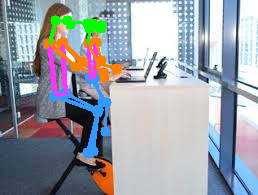

In [ ]:
image = np.asarray(image)
for idx in range(pred.shape[0]):
    plot_skeleton_kpts(image, pred[idx].T, 3)
    
image = Image.fromarray(image)
image